# 인코딩(encoding)과 디코딩(decoding)

- 인코딩-디코딩 아키텍쳐는 통신, 암호, 전자 등 다양한 분야에 적용되는 일반적인 프레임워크

- 인코더는 입력 데이터를 받아 내부적으로 더 낮은 차원의 표현(잠재 공간 표현)으로 변환합니다. 이 과정에서 데이터의 중요한 특징이나 패턴을 학습하게 됩니다.

- 디코더는 인코더에서 생성된 낮은 차원의 표현을 다시 원래의 차원으로 복원하려고 시도합니다. 이 과정을 통해 인코더가 얼마나 잘 중요 정보를 추출하고 보존했는지를 평가할 수 있습니다.

- 예를 들어, 이미지와 오디오 압축 포맷

  - JPEG 도구는 미디어 파일을 가벼운 이진파일로 압축하여 인코딩하고, 표시할 떄 픽셀 값을 복원하기 위해 디코딩

  <img src="https://image.slidesharecdn.com/aes171113-180510014736/95/-48-638.jpg?cb=1525916931">

  <sub>[이미지 출처] https://www.slideshare.net/NaverEngineering/ss-96581209</sub>

# 오토인코더(Autoencoder, AE)

- 오토인코더는 자기 자신을 복제하는 방식으로 훈련됩니다. 즉, 입력 데이터를 그대로 출력 데이터로 사용하면서, 인코더와 디코더를 통해 입력 데이터가 얼마나 잘 재구성되는지를 학습합니다. 이 때, 중간의 잠재 공간은 입력 데이터의 압축된 표현을 담게 됩니다.
- 오토인코더의 효율성은 얼마나 적은 손실로 원본 데이터를 재구성할 수 있는지에 따라 결정됩니다. 이를 통해 데이터의 중요한 특성을 학습하고 불필요한 정보는 버리게 된다.


  <img src="https://miro.medium.com/max/1200/1*nqzWupxC60iAH2dYrFT78Q.png">

  <sub>[이미지 출처] https://medium.com/@birla.deepak26/autoencoders-76bb49ae6a8f</sub>

autoencoder는 입력을 출력에 복사하도록 훈련된 특수한 유형의 신경망입니다. 예를 들어, 손으로 쓴 숫자의 이미지가 주어지면 autoencoder는 먼저 이미지를 더 낮은 차원의 잠재 표현으로 인코딩한 다음 잠재 표현을 다시 이미지로 디코딩합니다. autoencoder는 재구성 오류를 최소화하면서 데이터를 압축하는 방법을 학습합니다.



## TensorFlow 및 기타 라이브러리 가져오기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## 데이터세트 로드하기

시작하려면 Fashon MNIST 데이터세트를 사용하여 기본 autoencoder를 훈련합니다. 이 데이터세트의 각 이미지는 28x28 픽셀입니다.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
latent_dim = 64 # latent_dim 변수는 잠재 공간의 차원 수를 정의

class Autoencoder(Model):
  def __init__(self, encoding_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28)) # 데이터를 원래의 형태인 28x28로 재구성
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

`x_train`을 입력과 대상으로 사용하여 모델을 훈련합니다. `encoder`는 데이터세트를 784차원에서 잠재 공간으로 압축하는 방법을 배우고, `decoder`는 원본 이미지를 재구성하는 방법을 배웁니다. .

In [ ]:
autoencoder.fit(x_train, x_train, # 특이하게 x_train, x_train. 인풋데이터와 출력이 같음.
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.0240 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0093
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.008

모델이 훈련되었으므로 테스트 세트에서 이미지를 인코딩 및 디코딩하여 테스트해 보겠습니다.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

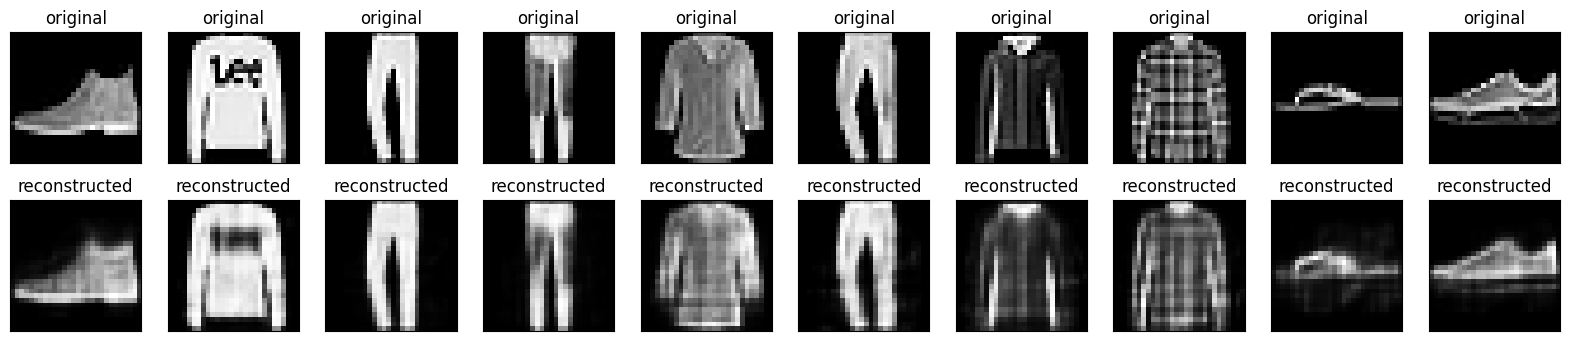

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## 두 번째 예: 이미지 노이즈 제거

[이미지 노이즈 제거 결과](https://github.com/tensorflow/docs-l10n/blob/master/site/ko/tutorials/generative/images/image_denoise_fmnist_results.png?raw=1)

autoencoder는 이미지에서 노이즈를 제거하도록 훈련될 수도 있습니다. 다음 섹션에서는 각 이미지에 임의의 노이즈를 적용하여 Fashion MNIST 데이터세트의 노이즈 버전을 생성합니다. 그런 다음 노이즈가 있는 이미지를 입력으로 사용하고 원본 이미지를 대상으로 사용하여 autoencoder를 훈련합니다.

이전에 수정한 내용을 생략하기 위해 데이터세트를 다시 가져오겠습니다.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
# x_train과 x_test 배열의 각 요소에 새로운 차원을 추가.
# 원본 데이터가 단순히 (높이, 너비)만 포함되어 있을 경우, 채널 차원(대부분 흑백 이미지의 경우 1)을 추가하기 위해 사용
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis] # [] 안에 기존의 배열을...으로 적고, 추가하고 싶은 위치에 tf.newaxis를 적어주면 간단히 size 변경이 된다.
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


이미지에 임의의 노이즈를 추가합니다.

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)
# 모든 값이 0과 1 사이에 있도록 클리핑하여 이미지 데이터가 유효한 픽셀 범위 내에 있도록 보장
# 노이즈를 추가할 때 값이 0보다 작아지거나 1을 초과할 수 있는데, 이를 방지하기 위해 사용
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


노이즈가 있는 이미지를 플롯합니다.


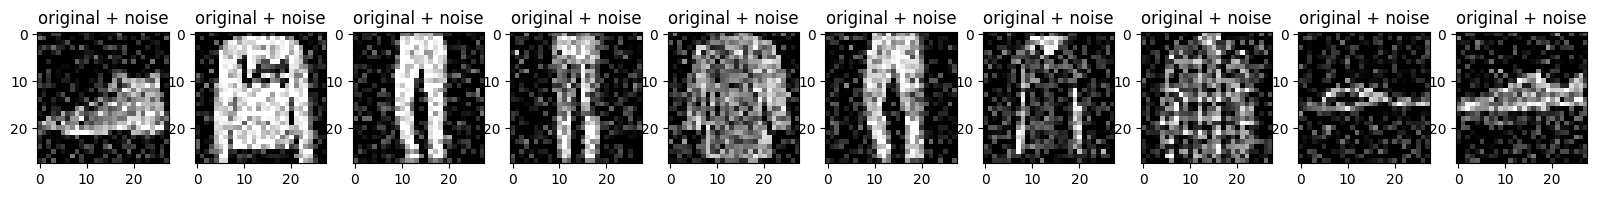

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### 컨볼루셔널 autoencoder 정의하기

이 예제에서는 <code>encoder</code>에 <a>Conv2D</a> 레이어를 사용하고 <code>decoder</code>에 <a>Conv2DTranspose</a> 레이어를 사용하여 컨볼루셔널 autoencoder를 훈련합니다.

In [ ]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
# 표준 컨볼루션 레이어가 입력의 차원을 줄이는 반면, Conv2DTranspose는 입력의 차원을 늘립니다.
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.0159 - val_loss: 0.0096
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0089 - val_loss: 0.0083
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0079 - val_loss: 0.0076
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0075 - val_loss: 0.0073
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0072 - val_loss: 0.0071
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0068 - val_loss: 0.0068
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.00

encoder의 요약을 살펴보겠습니다. 이미지가 28x28에서 7x7로 어떻게 다운샘플링되는지 확인하세요.

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
Total params: 1320 (5.16 KB)
Trainable params: 1320 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


decoder는 이미지를 7x7에서 28x28로 다시 업샘플링합니다.

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_transpose (Conv2DTr  (None, 14, 14, 8)         584       
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 16)        1168      
 Transpose)                                                      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 1897 (7.41 KB)
Trainable params: 1897 (7.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


autoencoder에서 생성된 노이즈가 있는 이미지와 노이즈가 제거 된 이미지를 모두 플롯합니다.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

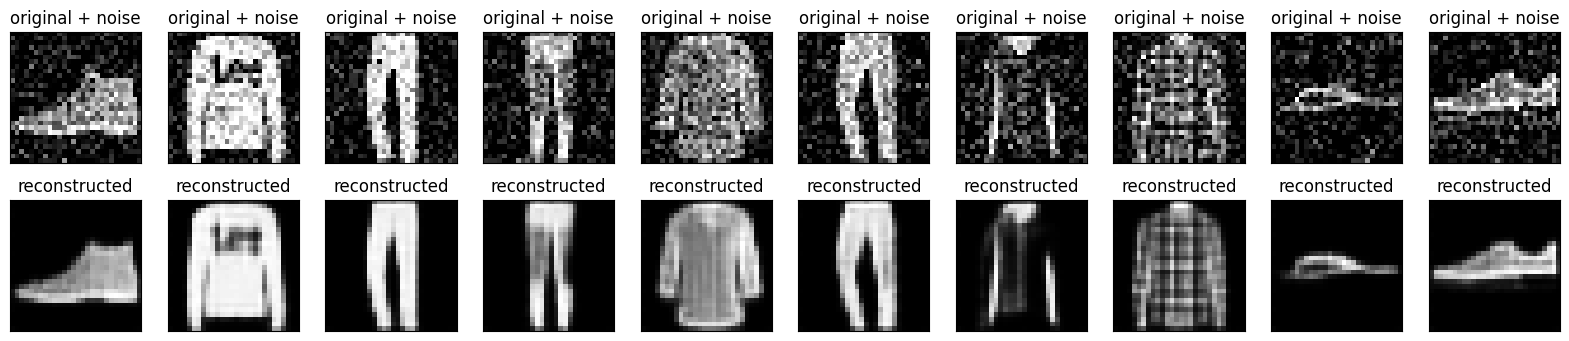

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 세 번째 예: 이상 감지

## 개요

- ECG 5000 데이터 세트에서 이상현상을 감지하도록 오토인코더를 훈련시킨다.
- 각각 140개의 데이터로 구성된 5000개의 심전도(ECG, Electrocardiograms)가 포함되어 있다.
- 각 예제는 0(비정상 리듬) 또는 1(정상 리듬)으로 레이블이 지정된 단순화 된 버전의 데이터셋을 사용한다.
- 이 예제는 레이블이 지정된 데이터셋이므로 지도학습 문제라고 할 수 있다.
- 이 예제의 목표는 사용 가능한 레이블이 없는 더 큰 데이터셋에 적용할 수 있는 이상현상 감지 개념을 설명하는 것이다.
- 오토 인코더는 재구성 오류를 최소화하도록 훈련되었다.
- 오토 인코더를 정상적인 리듬으로만 훈련한 뒤 이를 사용하여 모든 데이터를 재구성한다.
- 여기서 우리의 가설은 비정상적인 리듬이 더 높은 재건(reconstruction) 오류를 가질 것이라는 것이다.
- 이것을 이용하여 오류가 임계값을 초과하는 경우 리듬을 이상으로 분류하는 것이다.

### ECG 데이터 로드하기

https://www.tensorflow.org/tutorials/generative/autoencoder?hl=ko

사용할 데이터세트는 [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000)의 데이터세트를 기반으로 합니다.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
# from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [3]:
# Download the dataset
import pandas as pd
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values # 데이터프레임에 values 를 하면 배열로 바뀜
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [4]:
dataframe.shape

(4998, 141)

In [6]:
dataframe.iloc[:,-1].value_counts()
# 1 은 정상인것
# 0 은 비정상인것

140
1.0    2919
0.0    2079
Name: count, dtype: int64

In [8]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

데이터를 `[0,1]`로 정규화합니다.


tf.cast함수에 대해서 알아보자.

텐서를 새로운 형태로 캐스팅하는데 사용한다.

부동소수점형에서 정수형으로 바꾼 경우 소수점 버림을 한다.

Boolean형태인 경우 True이면 1, False이면 0을 출력한다.

In [9]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [10]:
train_data.shape

TensorShape([3998, 140])

In [11]:
train_labels.shape

(3998,)

이 데이터세트에서 `1`로 레이블이 지정된 정상 리듬만 사용하여 autoencoder를 훈련합니다. 정상 리듬과 비정상 리듬을 분리합니다.

In [12]:
# train_labels와 test_labels 배열에서 True로 표시된 인덱스에 해당하는 train_data와 test_data의 요소들을 선택
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

In [13]:
pd.Series(train_labels).value_counts()

True     2359
False    1639
Name: count, dtype: int64

In [14]:
normal_train_data.shape

TensorShape([2359, 140])

정상적인 ECG를 플롯합니다.

In [17]:
normal_train_data[0]

<tf.Tensor: shape=(140,), dtype=float32, numpy=
array([0.57030463, 0.46561658, 0.29058117, 0.17791584, 0.09538919,
       0.08467858, 0.20195104, 0.3163002 , 0.33732033, 0.41424882,
       0.47070596, 0.4691905 , 0.47767755, 0.4800409 , 0.47027245,
       0.4729927 , 0.47917148, 0.48027468, 0.4692887 , 0.46106863,
       0.46148038, 0.4465829 , 0.45325327, 0.45610094, 0.4489618 ,
       0.4432532 , 0.43402174, 0.44307235, 0.43250525, 0.43014902,
       0.41454658, 0.4120653 , 0.4042028 , 0.41054544, 0.4082913 ,
       0.40342993, 0.39648476, 0.39332044, 0.39158815, 0.39603877,
       0.40746954, 0.4053118 , 0.4173488 , 0.41624558, 0.42334118,
       0.44590637, 0.4455184 , 0.44474098, 0.44404328, 0.45673218,
       0.45217463, 0.4532504 , 0.46082932, 0.46695936, 0.46631944,
       0.4743283 , 0.4629709 , 0.4738895 , 0.46788898, 0.4673448 ,
       0.48026675, 0.4843984 , 0.48574668, 0.48985568, 0.49317348,
       0.4883041 , 0.49913937, 0.5057092 , 0.5078241 , 0.51323026,
       0.52119

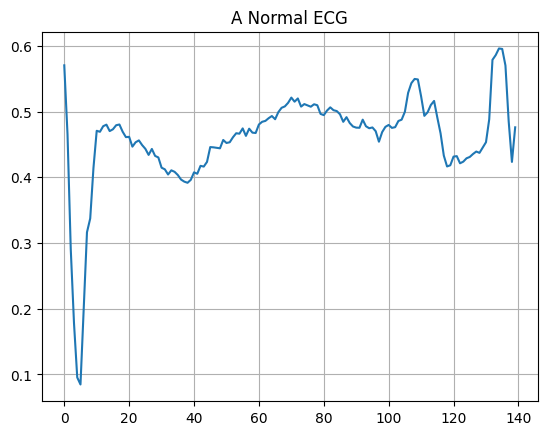

In [16]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

비정상적인 ECG를 플롯합니다.

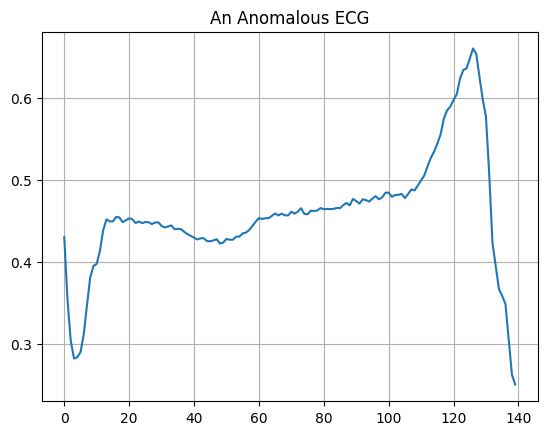

In [18]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### 모델 빌드하기

In [23]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
# sigmoid 함수는 주로 이진 분류에서 출력 레이어에 사용하지만 여러 출력 노드가 있을 경우에도 0과 1사이의 값을 가질 때 사용 가능.
# sigmoid 는 모든 입력에 대해 0과 1사이의 출력을 보장. 이는 출력 데이터가 특정 범위 내에서 원하는 형태로 제한되어야 할 때 유용
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [24]:
autoencoder.compile(optimizer='adam', loss='mae')

autoencoder는 일반 ECG만 사용하여 훈련되지만, 전체 테스트세트를 사용하여 평가됩니다.

In [21]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 2s 124ms/step - loss: 0.0581 - val_loss: 0.0532
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0564 - val_loss: 0.0519
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0546 - val_loss: 0.0503
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0521 - val_loss: 0.0484
Epoch 5/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0487 - val_loss: 0.0469
Epoch 6/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0448 - val_loss: 0.0457
Epoch 7/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0411 - val_loss: 0.0437
Epoch 8/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0373 - val_loss: 0.0416
Epoch 9/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0342 - val_loss: 0.0406
Epoch 10/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0318 - val_loss: 0.0396
Epoch 11/20
5/5 [===========

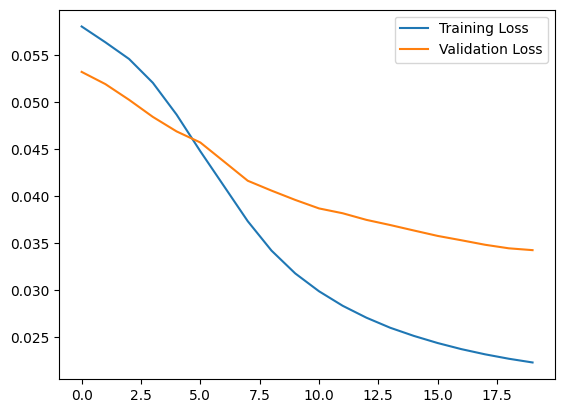

In [25]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

- 재구성 오류가 일반 ECG의 표준 편차 1보다 큰 경우 ECG를 비정상으로 분류하도록 정의한다.
- 학습 세트에서 일반 ECG, 오토 인코더에 의해 인코딩 및 디코딩 된 후의 재구성 및 재구성 오류를 플로팅 한다.

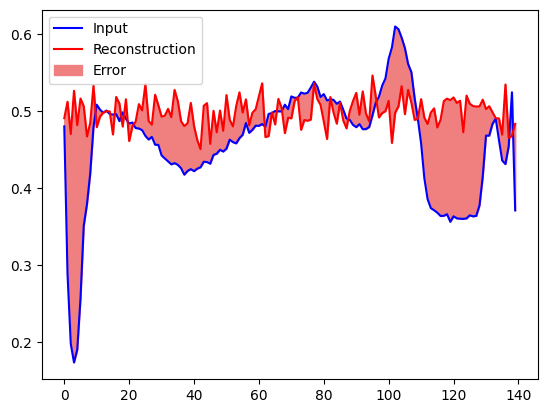

In [26]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

같은 방식의 이상현상 샘플 플로팅

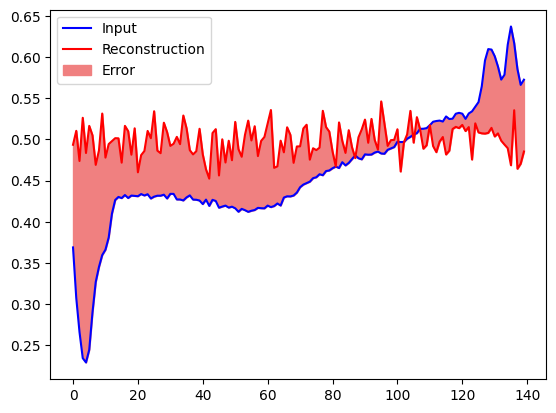

In [27]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_imgs[0], 'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()
# 그래프를 통해 편차가 어떻게 되는지 확인..

## 이상현상 탐지
- 재구성 손실이 고정 임계 값보다 큰지 여부를 계산하여 이상을 감지한다.
- 이 튜토리얼에서는 훈련 세트의 정상 예제에 대한 MAE를 계산한 다음 재구성 오차가 훈련 세트의 표준 편차보다 큰 경우 예제를 비정상적인 것으로 분류한다.


74/74 [==============================] - 0s 1ms/step


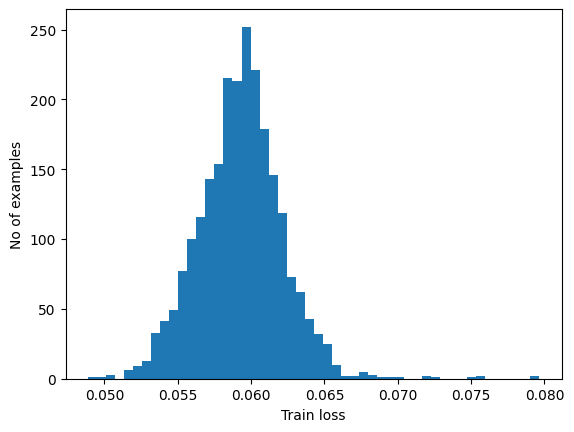

In [28]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)
# reconstructions, normal_train_data 의 오차를 train_loss로 저장

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

- 평균보다 1SD가 높은 임계값을 선택한다.
- 통계수준에서 2SD를 벗어나게 되면, 95%의 신뢰구간을 벗어나는 것을 의미한다.

In [30]:
threshold = np.mean(train_loss) + np.std(train_loss) # 통계 + 표준편차 를 임계치를 기준으로 판단.
print("Threshold: ", threshold)

Threshold:  0.062199607


14/14 [==============================] - 0s 2ms/step


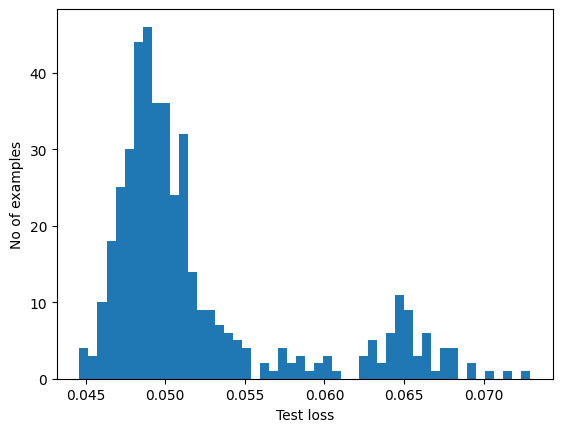

In [31]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

재구성 오류가 임계값보다 큰 경우 심전도를 이상 현상으로 분류하도록 설정

In [32]:
# 계산된 MAE가 설정된 threshold보다 작은 경우 True를 반환합니다. 즉, 손실이 임계값보다 낮으면 정상 데이터로 판단하고, 그렇지 않으면 이상 데이터로 간주
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [33]:
preds = predict(autoencoder, test_data, threshold)
print(preds[:10])

tf.Tensor([ True False  True  True  True  True  True  True  True  True], shape=(10,), dtype=bool)


In [34]:
print_stats(preds, test_labels)

Accuracy = 0.547
Precision = 0.5614236509758898
Recall = 0.8732142857142857
